In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 1000

# Qualitative analysis

In [3]:
data = pd.read_csv("data/mergedData2.csv")

In [4]:
data.columns

Index(['wid', 'hmid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category', 'age', 'country', 'gender', 'marital',
       'parenthood'],
      dtype='object')

### Dimensions of dataset

Features: age group, country, gender, marital status, parenthood, reflection period


Outcome: predicted category, unigram, bigram

In [28]:
data_group_1 = data[(data["country"] == "USA") & (data["marital"] == "married") & (data["reflection_period"] == "24h") & (data["ground_truth_category"] == "enjoy_the_moment")]

In [29]:
data_group_1.shape

(220, 14)

In [30]:
#data_group_1 = data_group_1.sample(100)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [32]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(data_group_1['cleaned_hm'])
tfidf_transformer = TfidfTransformer()
sparse_matrix_new = tfidf_transformer.fit_transform(sparse_matrix)
frequencies = sum(sparse_matrix_new).toarray()[0]
bag_of_words = pd.DataFrame({'bag_of_words': word_vectorizer.get_feature_names(), 'frequency': frequencies})

In [33]:
nnnn = bag_of_words.sort_values('frequency', ascending=False)

In [34]:
nn = nnnn.head(10)
nn

,bag_of_words,frequency
200,ate great steak,3.000000
1171,made me happy,2.633241
2225,was able to,2.206902
995,in the mail,1.824660
439,cup of coffee,1.586881
16,able to sleep,1.470806
1186,makes me happy,1.437323
2099,to sleep in,1.384523
1050,it made me,1.270481
1420,of my favorite,1.211197


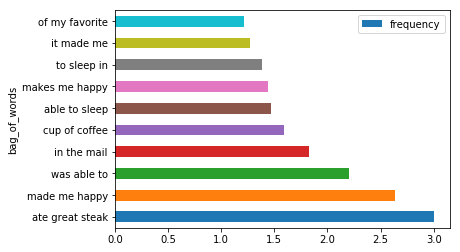

In [35]:
nn.plot(x='bag_of_words', y='frequency', kind='barh')

In [13]:
#dd = data_group_1[data_group_1['cleaned_hm'].str.contains(nn.iloc[0]['bag_of_words'])]
dd = data_group_1[data_group_1['cleaned_hm'].str.contains('pizza')]

In [14]:
dd.shape

(17, 14)

In [15]:
dd.sample(10)

,wid,hmid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood
47726,1024,114856,24h,I got to eat a couple slices of cheese pizza after eating vegan for the entirety of last week.,I got to eat a couple slices of cheese pizza after eating vegan for the entirety of last week.,True,1,enjoy_the_moment,enjoy_the_moment,34,USA,m,single,y
23192,372,55609,24h,I was happy when I got pizza at Pizza Hut.,I was happy when I got pizza at Pizza Hut.,True,1,enjoy_the_moment,enjoy_the_moment,19,USA,m,single,n
59351,1590,125716,24h,I ordered a pepperoni pizza.,I ordered a pepperoni pizza.,True,1,enjoy_the_moment,enjoy_the_moment,22,USA,m,single,n
92729,10129,56949,24h,I broke being vegan and ate two slices of pizza today.,I broke being vegan and ate two slices of pizza today.,True,1,enjoy_the_moment,enjoy_the_moment,25,USA,o,single,n
43902,887,38136,24h,"I had pizza for lunch, I love pizza makes me happy.","I had pizza for lunch, I love pizza makes me happy.",True,1,enjoy_the_moment,enjoy_the_moment,35,USA,m,single,n
60743,1683,51179,24h,I ate pizza for dinner tonight!,I ate pizza for dinner tonight!,True,1,enjoy_the_moment,enjoy_the_moment,23,USA,m,single,n
31307,540,123619,24h,"I ate a Papa Johns Pizza. Even though I'm trying to eat healthier I always have a day where I allow myself to eat junk food, and on that day I got Papa Johns, it my favorite pizza place.","I ate a Papa Johns Pizza. Even though I'm trying to eat healthier I always have a day where I allow myself to eat junk food, and on that day I got Papa Johns, it my favorite pizza place.",True,2,enjoy_the_moment,enjoy_the_moment,21,USA,m,single,n
61196,1715,38215,24h,I ate a delicious meal w pizza and mozzarella sticks.,I ate a delicious meal w pizza and mozzarella sticks.,True,1,enjoy_the_moment,enjoy_the_moment,30,USA,f,single,n
70966,2740,113970,24h,I was happy when I ordered a pizza and only had to pay for the delivery charge.,I was happy when I ordered a pizza and only had to pay for the delivery charge.,True,1,enjoy_the_moment,enjoy_the_moment,21,USA,m,single,n
22992,369,29647,24h,I made myself pizza for dinner and sampled some home brewed beer.,I made myself pizza for dinner and sampled some home brewed beer.,True,1,enjoy_the_moment,enjoy_the_moment,37,USA,m,single,n


In [16]:
data_group_2 = data[(data["country"] == "USA")]
dd11 = data_group_2[data_group_2['cleaned_hm'].str.contains('pizza')]

In [17]:
dd11.shape

(525, 14)

In [18]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(dd11['cleaned_hm'])
tfidf_transformer = TfidfTransformer()
sparse_matrix_new = tfidf_transformer.fit_transform(sparse_matrix)
frequencies = sum(sparse_matrix_new).toarray()[0]
bag_of_words = pd.DataFrame({'bag_of_words': word_vectorizer.get_feature_names(), 'frequency': frequencies})

In [19]:
nnnn11 = bag_of_words.sort_values('frequency', ascending=False)

In [20]:
nnnn11[nnnn11.bag_of_words.str.contains('papa')]

,bag_of_words,frequency
2169,papa murphy,0.408248
2168,papa johns,0.367669
292,ate papa,0.183835
1166,got papa,0.183835


In [21]:
nnnn11[nnnn11.bag_of_words.str.contains('domin')]

,bag_of_words,frequency
279,ate dominoes,0.636280
747,dominoes pizza,0.636280
1044,from domino,0.554500
746,domino pizza,0.415002
676,delicious domino,0.415002
744,domino and,0.319191
745,domino due,0.271768
748,dominos to,0.202593
1045,from dominos,0.202593


In [22]:
nnnn11.head()

,bag_of_words,frequency
2224,pizza for,25.758538
965,for dinner,21.689691
1225,had pizza,14.719627
293,ate pizza,12.154797
3387,with my,10.530196


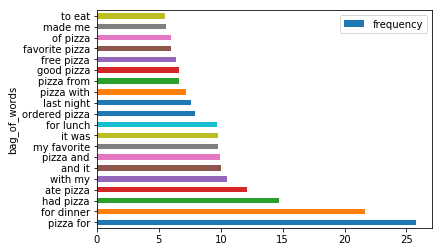

In [23]:
nnnn11.head(20).plot(x='bag_of_words', y='frequency', kind='barh')